# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [2]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 121.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [2]:
# Import the first file - True.csv
df_true = pd.read_csv('True.csv')

# Import the second file - Fake.csv
df_fake = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
display(df_true.head())
print(df_true.info())
print(df_true.shape)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None
(21417, 3)


In [6]:
# Inspect the DataFrame with Fake News to understand the given data
display(df_fake.head())
display(df_fake.info())
display(df_fake.shape)

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


None

(23523, 3)

In [7]:
# Print the column details for True News DataFrame
print(df_true.columns)

Index(['title', 'text', 'date'], dtype='object')


In [8]:
# Print the column details for Fake News Dataframe
print(df_fake.columns)

Index(['title', 'text', 'date'], dtype='object')


In [9]:
# Print the column names of both DataFrames
print(df_true.columns)
print(df_fake.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [3]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [4]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([df_true, df_fake], ignore_index=True)

In [13]:
# Display the first 5 rows of the combined DataFrame to verify the result
display(df.head())

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [14]:
# Check Presence of Null Values
display(df.isnull().sum())

title         21
text          21
date          42
news_label     0
dtype: int64

In [5]:
# Handle Rows with Null Values
df.dropna(inplace=True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [6]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + ' ' + df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
df.drop(['title', 'text', 'date'], axis=1, inplace=True)

# Display the first 5 rows of the updated DataFrame to check the result
display(df.head())

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [7]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
# df_clean = pd.DataFrame()

# Add 'news_label' column to the new dataframe for topic identification
# df_clean['news_label'] = df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [7]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [11]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
# df_clean['cleaned_news_text'] = df['news_text'].apply(clean_text)

chunk_size = 500  # Define a suitable chunk size
cleaned_texts = []
lemmatized_texts = []

for i in tqdm(range(0, len(df), chunk_size)):
    chunk = df['news_text'][i:i + chunk_size]
    cleaned_chunk = chunk.apply(clean_text)
    lemmatized_chunk = cleaned_chunk.apply(lemmatize_text_with_pos)

    cleaned_texts.extend(cleaned_chunk)
    lemmatized_texts.extend(lemmatized_chunk)

# Create a new DataFrame with the processed texts and news_label
df_clean = pd.DataFrame({
    'news_label': df['news_label'],
    'cleaned_news_text': cleaned_texts,
    'lemmatized_news_text': lemmatized_texts
})

display(df_clean.head())

100%|██████████| 90/90 [36:33<00:00, 24.38s/it]


news_label                                  cleaned_news_text  \
0           1  as us budget fight looms republicans flip thei...   
1           1  us military to accept transgender recruits on ...   
2           1  senior us republican senator let mr mueller do...   
3           1  fbi russia probe helped by australian diplomat...   
4           1  trump wants postal service to charge much more...   

                                lemmatized_news_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  mueller job counsel investigation link electio...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service service ship package amzno fight...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [10]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def lemmatize_text_with_pos(text):
    doc = nlp(text)
    # Filter for nouns (NN, NNS) and lemmatize
    lemmatized_tokens = [token.lemma_ for token in doc if token.pos_ in ['NOUN']]
    return " ".join(lemmatized_tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
# df_clean['lemmatized_news_text'] = df_clean['cleaned_news_text'].apply(lemmatize_text_with_pos)

### Save the Cleaned data as a csv file (Recommended)

In [12]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [13]:
# Check the first few rows of the DataFrame
display(df_clean.head())

news_label                                  cleaned_news_text  \
0           1  as us budget fight looms republicans flip thei...   
1           1  us military to accept transgender recruits on ...   
2           1  senior us republican senator let mr mueller do...   
3           1  fbi russia probe helped by australian diplomat...   
4           1  trump wants postal service to charge much more...   

                                lemmatized_news_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  mueller job counsel investigation link electio...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service service ship package amzno fight...

In [14]:
# Check the dimensions of the DataFrame
display(df_clean.shape)

(44898, 3)

In [15]:
# Check the number of non-null entries and data types of each column
display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   news_label            44898 non-null  int64 
 1   cleaned_news_text     44898 non-null  object
 2   lemmatized_news_text  44882 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


None

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [16]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

X = df_clean[['cleaned_news_text', 'lemmatized_news_text']]
y = df_clean['news_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (31428, 2)
Shape of X_test: (13470, 2)
Shape of y_train: (31428,)
Shape of y_test: (13470,)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [17]:
# Add a new column to calculate the character length of cleaned news text
X_train['cleaned_text_length'] = X_train['cleaned_news_text'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
X_train['lemmatized_text_length'] = X_train['lemmatized_news_text'].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

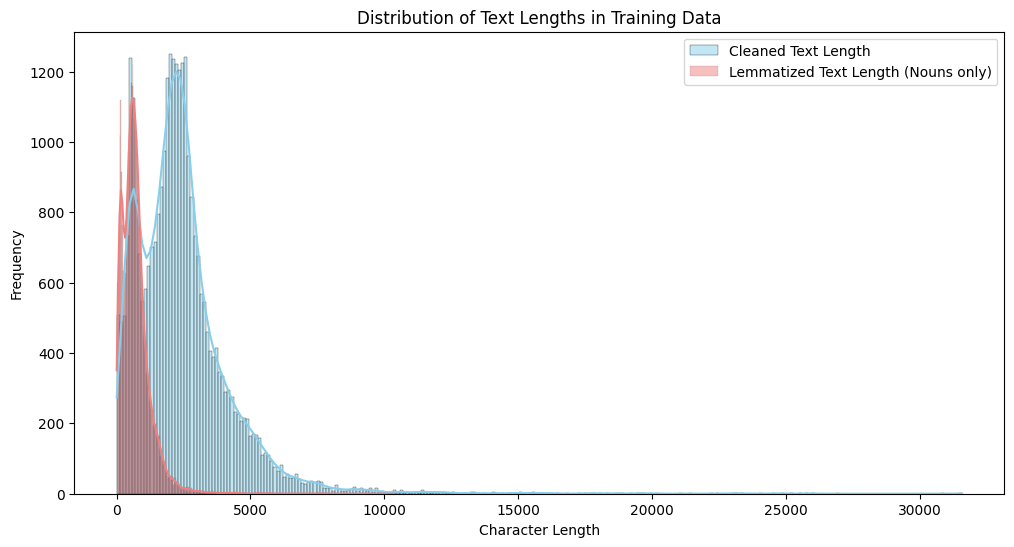

In [18]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
sns.histplot(X_train['cleaned_text_length'], color='skyblue', label='Cleaned Text Length', kde=True)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(X_train['lemmatized_text_length'], color='lightcoral', label='Lemmatized Text Length (Nouns only)', kde=True)

plt.title('Distribution of Text Lengths in Training Data')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

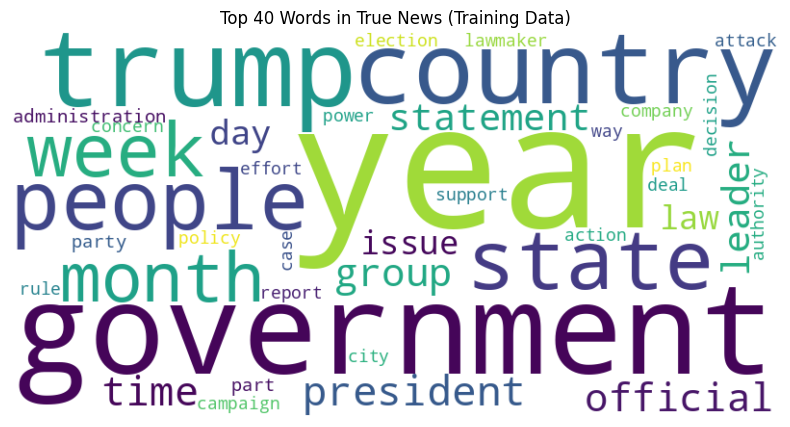

In [20]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = " ".join(X_train[y_train == 1]['lemmatized_news_text'].astype(str).tolist())

# Generate word cloud for True News
from wordcloud import WordCloud
wordcloud_true = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(true_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

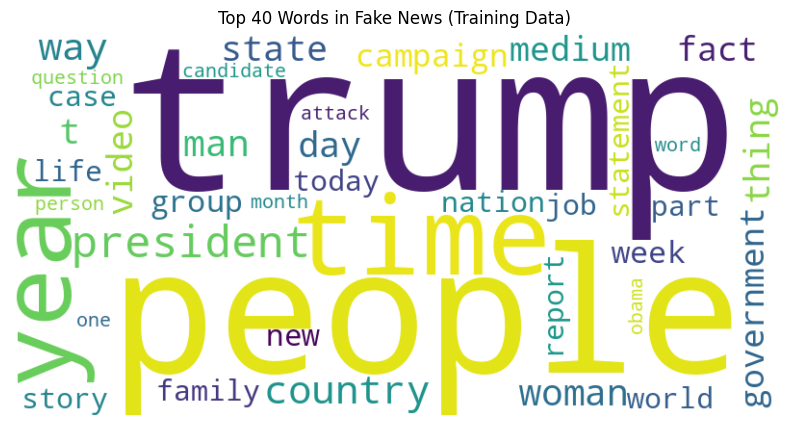

In [33]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = " ".join(X_train[y_train == 0]['lemmatized_news_text'].astype(str).tolist())

# Generate word cloud for Fake News
from wordcloud import WordCloud
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(fake_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Data)')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [22]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, n=None, top_n=None):
    vec = CountVectorizer(ngram_range=n).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [23]:
# Handle NaN values in the text data
X_train['lemmatized_news_text'].fillna('', inplace=True)

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
trump: 25377
state: 14403
government: 13838
year: 13188
people: 10882
election: 9906
country: 9839
official: 9301
party: 8100
campaign: 7937


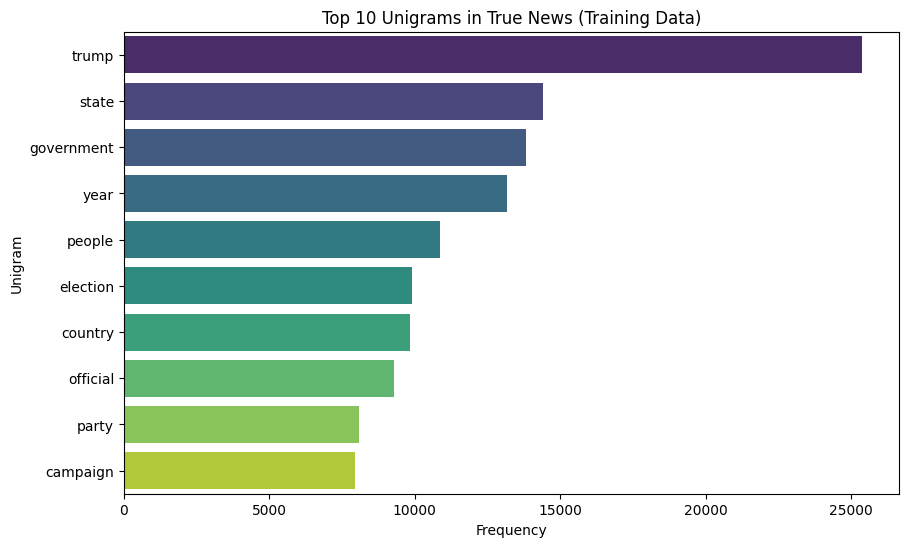

In [25]:
# Filter true news
true_news_corpus = X_train[y_train == 1]['lemmatized_news_text'].tolist()

# Get top 10 unigrams for true news
top_unigrams_true = get_top_ngrams(true_news_corpus, n=(1, 1), top_n=10)

# Display the top unigrams
print("Top 10 Unigrams in True News:")
for word, freq in top_unigrams_true:
    print(f"{word}: {freq}")

# Plot the top unigrams
words, freqs = zip(*top_unigrams_true)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.title('Top 10 Unigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Bigrams in True News:
trump campaign: 1258
news conference: 952
percent percent: 758
security force: 722
request comment: 719
climate change: 712
tax reform: 704
trump administration: 682
house representative: 646
intelligence agency: 640


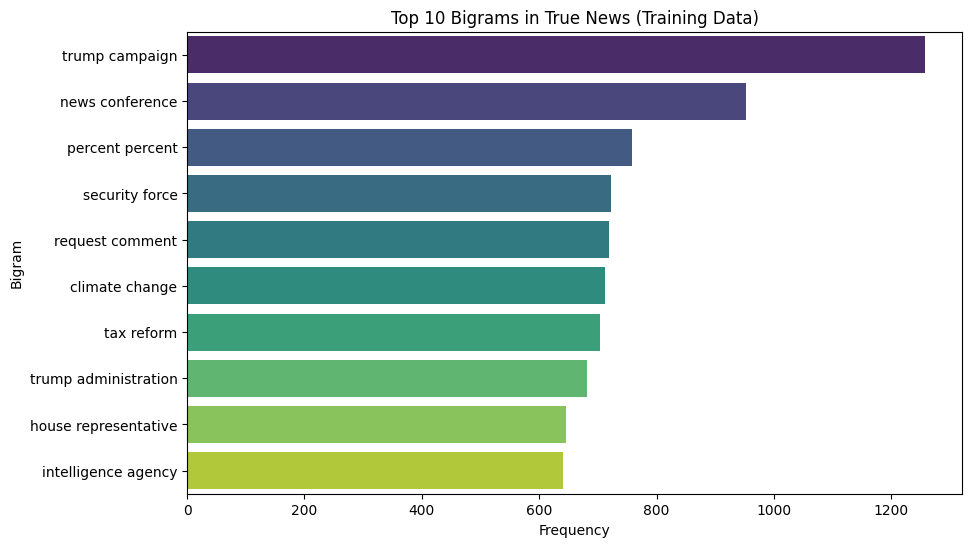

In [26]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

# Get top 10 bigrams for true news
top_bigrams_true = get_top_ngrams(true_news_corpus, n=(2, 2), top_n=10)

# Display the top bigrams
print("\nTop 10 Bigrams in True News:")
for word, freq in top_bigrams_true:
    print(f"{word}: {freq}")

# Plot the top bigrams
words, freqs = zip(*top_bigrams_true)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.title('Top 10 Bigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Trigrams in True News:
official condition anonymity: 235
trump transition team: 180
tax rate percent: 160
state department official: 123
circuit court appeal: 122
article part staff: 122
part staff involvement: 122
staff involvement creation: 122
involvement creation production: 122
trump travel ban: 114


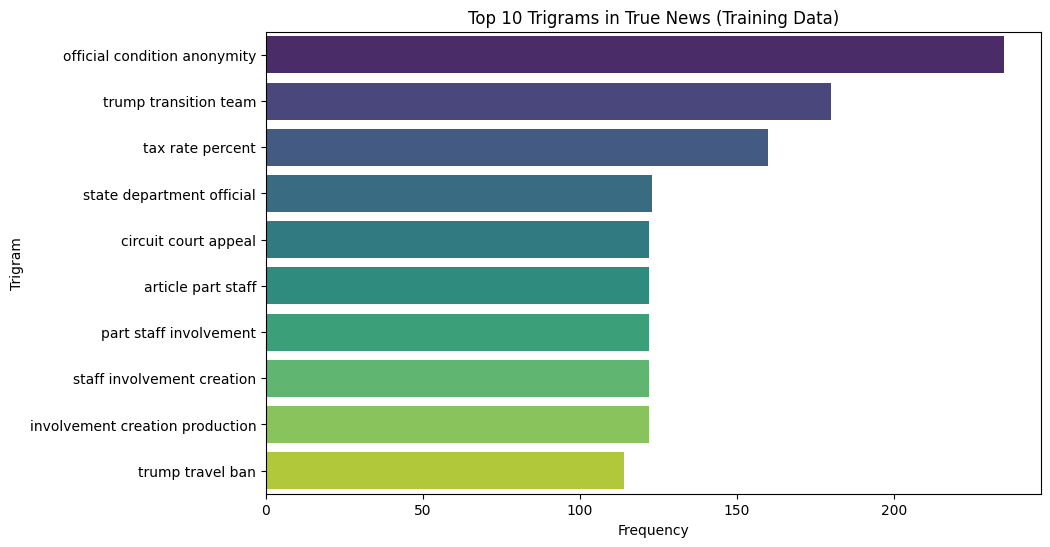

In [27]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Get top 10 trigrams for true news
top_trigrams_true = get_top_ngrams(true_news_corpus, n=(3, 3), top_n=10)

# Display the top trigrams
print("\nTop 10 Trigrams in True News:")
for word, freq in top_trigrams_true:
    print(f"{word}: {freq}")

# Plot the top trigrams
words, freqs = zip(*top_trigrams_true)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.title('Top 10 Trigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [28]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

# Filter fake news
fake_news_corpus = X_train[y_train == 0]['lemmatized_news_text'].tolist()

# Get top 10 unigrams for fake news
top_unigrams_fake = get_top_ngrams(fake_news_corpus, n=(1, 1), top_n=10)

# Display the top unigrams
print("Top 10 Unigrams in Fake News:")
for word, freq in top_unigrams_fake:
    print(f"{word}: {freq}")

# Plot the top unigrams
words, freqs = zip(*top_unigrams_fake)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.title('Top 10 Unigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

Top 10 Unigrams in Fake News:
trump: 35609
people: 18278
time: 11199
president: 10345
year: 10298
image: 9769
state: 8764
woman: 8363
video: 7970
news: 7651


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [29]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

# Get top 10 bigrams for fake news
top_bigrams_fake = get_top_ngrams(fake_news_corpus, n=(2, 2), top_n=10)

# Display the top bigrams
print("\nTop 10 Bigrams in Fake News:")
for word, freq in top_bigrams_fake:
    print(f"{word}: {freq}")

# Plot the top bigrams
words, freqs = zip(*top_bigrams_fake)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.title('Top 10 Bigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


Top 10 Bigrams in Fake News:
trump supporter: 1446
century wire: 1299
image image: 1269
police officer: 1168
trump campaign: 1132
law enforcement: 1070
trump realdonaldtrump: 968
screen capture: 928
donald trump: 911
climate change: 816


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Trigrams in Fake News:
news century wire: 604
video screen capture: 520
image video screen: 495
image getty image: 396
image screen capture: 308
image chip image: 180
century wire file: 165
image video screenshot: 164
law enforcement officer: 163
broadcast boiler room: 156


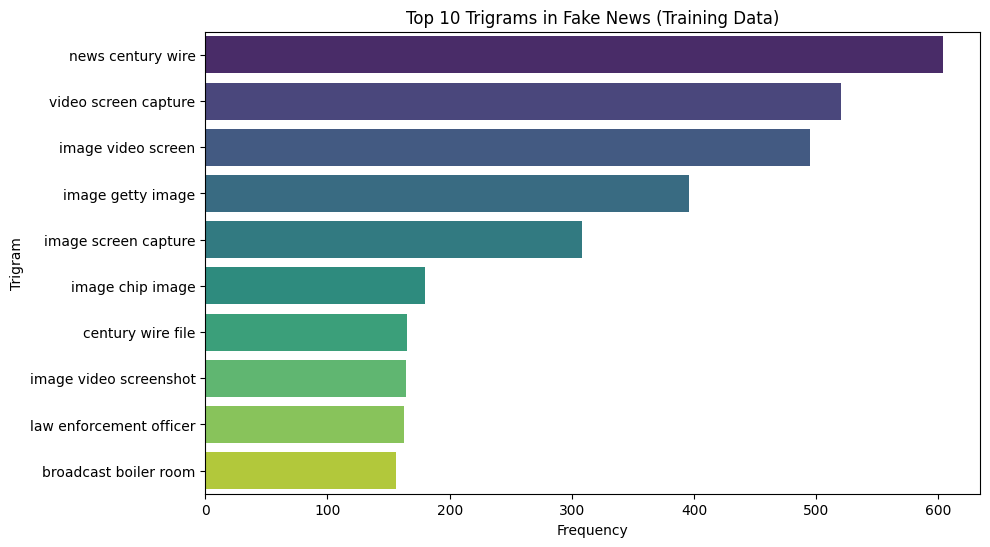

In [30]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

# Get top 10 trigrams for fake news
top_trigrams_fake = get_top_ngrams(fake_news_corpus, n=(3, 3), top_n=10)

# Display the top trigrams
print("\nTop 10 Trigrams in Fake News:")
for word, freq in top_trigrams_fake:
    print(f"{word}: {freq}")

# Plot the top trigrams
words, freqs = zip(*top_trigrams_fake)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.title('Top 10 Trigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [40]:
# Add a new column to calculate the character length of cleaned news text
import gc
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
gc.collect()

# del df_fake
# del df_true


95




##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [16]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [37]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Download the pre-trained Word2Vec model
# This might take some time depending on your internet connection
word2vec_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [41]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def document_vector(doc, model):
    # Remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.key_to_index]
    if not doc:
        return np.zeros(model.vector_size)
    # Average the word vectors
    return np.mean(model[doc], axis=0)

# Handle potential NaN values in X_test before vectorization
X_test['lemmatized_news_text'].fillna('', inplace=True)

# Extract vectors for training data
X_train_vectors = np.array([document_vector(doc, word2vec_model) for doc in X_train['lemmatized_news_text']])

# Extract vectors for validation data
X_test_vectors = np.array([document_vector(doc, word2vec_model) for doc in X_test['lemmatized_news_text']])


## Extract the target variable for the training data and validation data
y_train_labels = y_train.values
y_test_labels = y_test.values

print("Shape of X_train_vectors:", X_train_vectors.shape)
print("Shape of X_test_vectors:", X_test_vectors.shape)
print("Shape of y_train_labels:", y_train_labels.shape)
print("Shape of y_test_labels:", y_test_labels.shape)

Shape of X_train_vectors: (31428, 300)
Shape of X_test_vectors: (13470, 300)
Shape of y_train_labels: (31428,)
Shape of y_test_labels: (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [43]:
## Initialise Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

## Train Logistic Regression model on training data
lr_model.fit(X_train_vectors, y_train_labels)

## Predict on validation data
lr_predictions = lr_model.predict(X_test_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [44]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test_labels, lr_predictions)
precision = precision_score(y_test_labels, lr_predictions)
recall = recall_score(y_test_labels, lr_predictions)
f1 = f1_score(y_test_labels, lr_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9053
Precision: 0.8968
Recall: 0.9058
F1-score: 0.9013


In [45]:
# Classification Report
print(classification_report(y_test_labels, lr_predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7045
           1       0.90      0.91      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [46]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train_labels)

## Predict on validation data
dt_predictions = dt_model.predict(X_test_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [47]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test_labels, dt_predictions)
precision = precision_score(y_test_labels, dt_predictions)
recall = recall_score(y_test_labels, dt_predictions)
f1 = f1_score(y_test_labels, dt_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8232
Precision: 0.8271
Recall: 0.7958
F1-score: 0.8111


In [48]:
# Classification Report
print(classification_report(y_test_labels, dt_predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      7045
           1       0.83      0.80      0.81      6425

    accuracy                           0.82     13470
   macro avg       0.82      0.82      0.82     13470
weighted avg       0.82      0.82      0.82     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [49]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)

## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train_labels)

## Predict on validation data
rf_predictions = rf_model.predict(X_test_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [50]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test_labels, rf_predictions)
precision = precision_score(y_test_labels, rf_predictions)
recall = recall_score(y_test_labels, rf_predictions)
f1 = f1_score(y_test_labels, rf_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9059
Precision: 0.9095
Recall: 0.8915
F1-score: 0.9004


In [51]:
# Classification Report
print(classification_report(y_test_labels, rf_predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7045
           1       0.91      0.89      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Based on the exploratory data analysis, we observed some interesting patterns. The character length visualization showed that cleaned text is significantly shorter than the original text, and lemmatization further reduces the length by focusing on nouns. The word clouds and n-gram analysis revealed different frequent terms and phrases in true and fake news, suggesting distinct vocabulary and topics are prevalent in each category. For instance, "trump" was a highly frequent unigram in both, but the surrounding words in bigrams and trigrams differed, indicating different contexts. Fake news also showed more terms related to online content like "video screen capture" and "image getty image."

Semantic classification using Word2Vec helped convert the text data into numerical vectors that capture some semantic relationships between words. This approach allows the models to understand the meaning of the text beyond simple keyword matching, which is crucial for distinguishing between true and fake news where subtle differences in language and context can be significant.

We trained and evaluated three supervised models: Logistic Regression, Decision Tree, and Random Forest. Here's a summary of their performance on the validation data:

| Model               | Accuracy | Precision | Recall | F1-score |
| :------------------ | :------- | :-------- | :----- | :------- |
| Logistic Regression | 0.9053   | 0.8968    | 0.9058 | 0.9013   |
| Decision Tree       | 0.8232   | 0.8271    | 0.7958 | 0.8111   |
| Random Forest       | 0.9059   | 0.9095    | 0.8915 | 0.9004   |

Based on these metrics, both **Logistic Regression** and **Random Forest** models performed significantly better than the Decision Tree model, achieving accuracies and F1-scores around 0.90. Choosing the "best" model depends on the specific priorities. If minimizing false positives (predicting fake news when it's true) is critical, precision is important. If minimizing false negatives (predicting true news when it's fake) is critical, recall is important. Both Logistic Regression and Random Forest show a good balance between precision and recall as seen in their classification reports.

Given the slightly higher accuracy and precision, the **Random Forest model** might be considered slightly better for this task if both precision and overall accuracy are prioritized.

Overall, the approach of using semantic classification with Word2Vec and supervised models appears promising for fake news detection, achieving good performance on the validation set. This approach leverages the semantic meaning of words, which is important for this type of classification task. The impact of such a model could be significant in helping to combat the spread of misinformation online.